In [6]:
import pandas as pd

# Load the cleaned CSV file
file_path = 'C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Regression/cleaned_housing.csv'
housing_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
housing_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.309401,0.982511,1.829115,-0.589961,-1.187381,2.545697,352100.0,0,0,0,1,0
1,-1.314387,0.982511,1.829115,-0.778200,-0.961785,1.429274,341300.0,0,0,0,1,0
2,-1.314387,0.982511,1.829115,-0.433908,-0.736188,0.186567,342200.0,0,0,0,1,0
3,-1.314387,0.982511,1.829115,-1.124442,-1.072076,0.318383,269700.0,0,0,0,1,0
4,-1.314387,0.977910,1.829115,0.451692,0.311582,0.057172,299200.0,0,0,0,1,0


In [7]:
from sklearn.model_selection import train_test_split #import for train and test

X = housing_data.drop('median_house_value', axis=1)  #contain all column except median, features /nputs) that  predict something.
y = housing_data['median_house_value'] # target variable /output that want to predict based on the features in X

# Convert categorical variable into 1/0, drop_first means drop the first category to avoid having too many similar columns.
X = pd.get_dummies(X, drop_first=True)

# Split the data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test size is 20% will set for testing, and the rest is to set for train
# random_state is to ensure the split is the same, confirm consistance 


Linear Regression Mean Absolute Error: 44781.68006191818
Linear Regression Mean Squared Error: 3567051925.4531736
Linear Regression R² Score: 0.5751525559072085


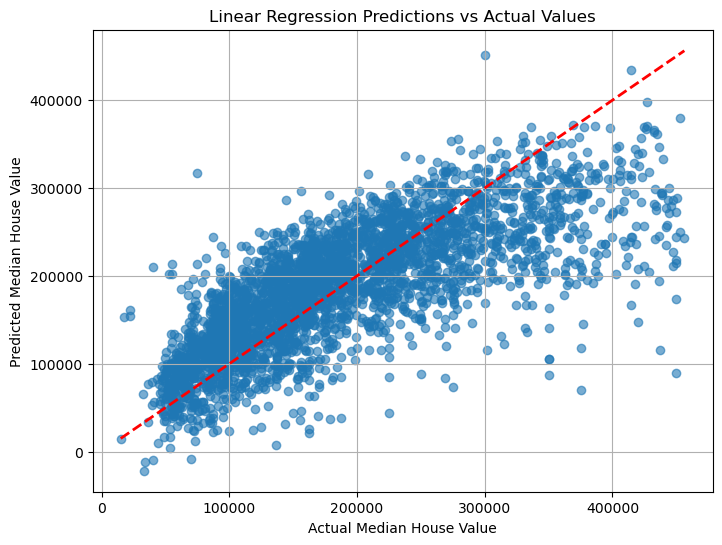

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #loss and accuracy
import matplotlib.pyplot as plt

# Linear Regression
lin_reg = LinearRegression() 
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin) #cauculate MSE, measures how far off the predictions are from the actual values.
r2_lin = r2_score(y_test, y_pred_lin) #calculate accuracy score close to 1 means not accuracy, 0 means accurate 

print(f"Linear Regression Mean Absolute Error: {mae_lin}")
print(f"Linear Regression Mean Squared Error: {mse_lin}")
print(f"Linear Regression R² Score: {r2_lin}")

# Plotting Linear Regression Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.6) #actual values(y_test), predicted values (y_pred_lin). Alpha=slightly transparent.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression Predictions vs Actual Values')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.grid()
plt.show()


Actual Median House Value: 107200.0
Predicted Median House Value: 133943.91196360427


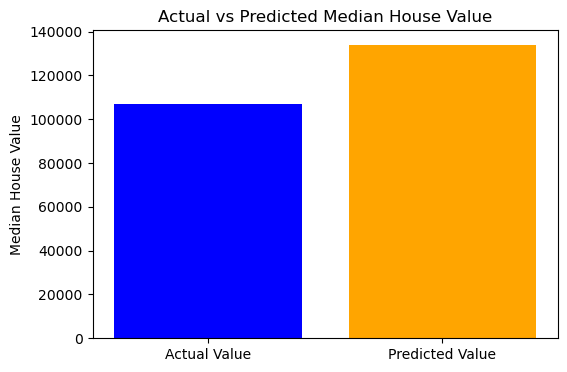

In [18]:
single_index = 50  # you can change this index to predict for another row
X_single = X_test.iloc[[single_index]]  # Select a single row for prediction
y_actual_single = y_test.iloc[single_index]  # Actual value for comparison

# Predict the value
y_pred_single = lin_reg.predict(X_single)

# Step 6: Print the actual and predicted value
print(f"Actual Median House Value: {y_actual_single}")
print(f"Predicted Median House Value: {y_pred_single[0]}")

# Step 7: Plot for visualization (optional)
plt.figure(figsize=(6, 4))
plt.bar(['Actual Value', 'Predicted Value'], [y_actual_single, y_pred_single[0]], color=['blue', 'orange'])
plt.title('Actual vs Predicted Median House Value')
plt.ylabel('Median House Value')
plt.show()


Decision Tree Regression Mean Absolute Error: 40169.26094674556
Decision Tree Regression Mean Squared Error: 3706289705.385207
Decision Tree Regression R² Score: 0.5585688850884094


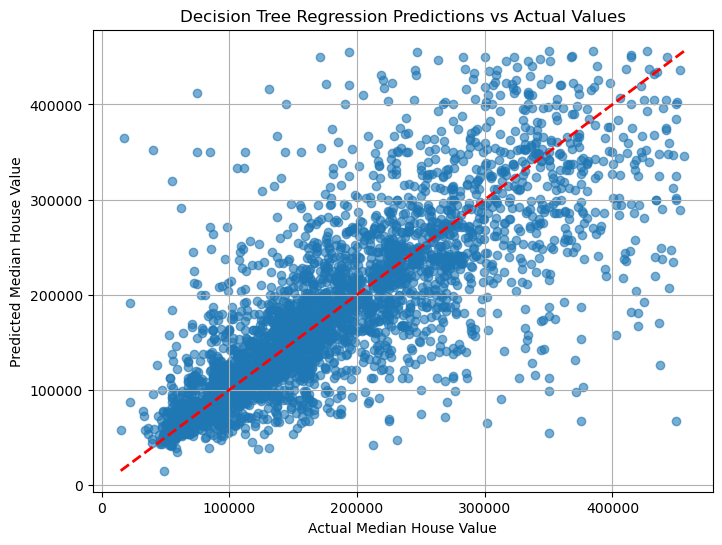

In [20]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
import matplotlib.pyplot as plt  

# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)  # create a Decision Tree model and set a random for repeading
tree_reg.fit(X_train, y_train)  
y_pred_tree = tree_reg.predict(X_test)  # use the train model to predict values for the test data

# Calculate Mean Squared Error (MSE) and R² Score for the predictions
mae_tree = mean_absolute_error(y_test, y_pred_tree)  # Calculate the Mean Absolute Error
mse_tree = mean_squared_error(y_test, y_pred_tree)  # Calculate how far off the predictions are from the actual values
r2_tree = r2_score(y_test, y_pred_tree)  # Calculate the R² Score, which tells how well the model fits the data

# Print the results of the Decision Tree model
print(f"Decision Tree Regression Mean Absolute Error: {mae_tree}")
print(f"Decision Tree Regression Mean Squared Error: {mse_tree}")
print(f"Decision Tree Regression R² Score: {r2_tree}")

# Plotting Decision Tree Regression Predictions
plt.figure(figsize=(8, 6)) 
plt.scatter(y_test, y_pred_tree, alpha=0.6)  # Create a scatter plot of actual vs. predicted values with some transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Add a diagonal line for reference
plt.title('Decision Tree Regression Predictions vs Actual Values') 
plt.xlabel('Actual Median House Value')  
plt.ylabel('Predicted Median House Value')
plt.grid()  
plt.show() 


Actual Median House Value: 107200.0
Predicted Median House Value: 130400.0


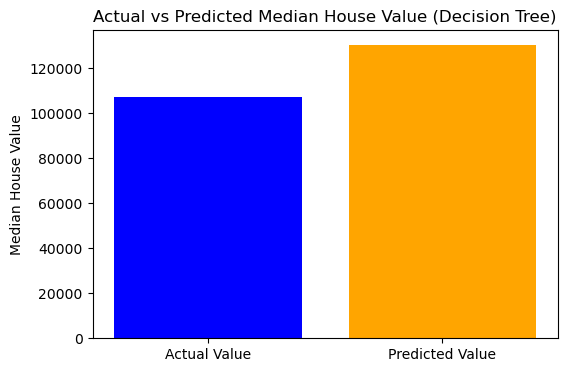

In [17]:
single_index = 50  # you can change this index to predict for another row
X_single = X_test.iloc[[single_index]]  # Select a single row for prediction
y_actual_single = y_test.iloc[single_index]  # Actual value for comparison

# Predict the value
y_pred_single = tree_reg.predict(X_single)

# Step 6: Print the actual and predicted value
print(f"Actual Median House Value: {y_actual_single}")
print(f"Predicted Median House Value: {y_pred_single[0]}")

# Step 7: Plot for visualization (optional)
plt.figure(figsize=(6, 4))
plt.bar(['Actual Value', 'Predicted Value'], [y_actual_single, y_pred_single[0]], color=['blue', 'orange'])
plt.title('Actual vs Predicted Median House Value (Decision Tree)')
plt.ylabel('Median House Value')
plt.show()


Comparison of Regression Models:


,Model,Mean Squared Error,R² Score
0,Linear Regression,3.567052e+09,0.575153
1,Decision Tree Regression,3.706290e+09,0.558569


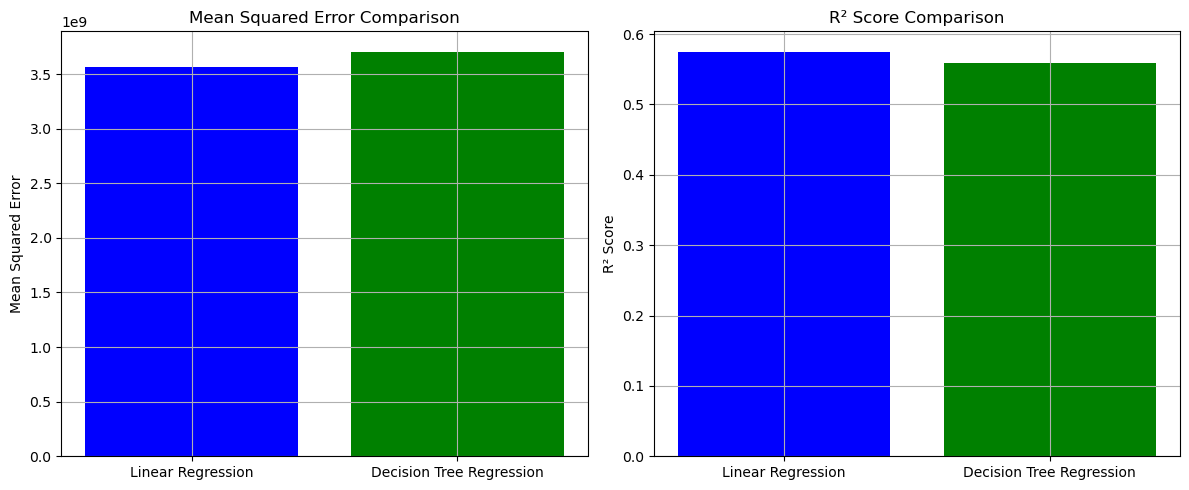

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming mse_lin, mse_tree, r2_lin, and r2_tree have been calculated in the previous cells

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regression'],
    'Mean Squared Error': [mse_lin, mse_tree],
    'R² Score': [r2_lin, r2_tree]
})

# Display the comparison DataFrame as a formatted table
print("Comparison of Regression Models:")
display(comparison_df)

# Visualizing the comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for MSE
ax[0].bar(comparison_df['Model'], comparison_df['Mean Squared Error'], color=['blue', 'green'])
ax[0].set_title('Mean Squared Error Comparison')
ax[0].set_ylabel('Mean Squared Error')
ax[0].grid()

# Bar plot for R² Score
ax[1].bar(comparison_df['Model'], comparison_df['R² Score'], color=['blue', 'green'])
ax[1].set_title('R² Score Comparison')
ax[1].set_ylabel('R² Score')
ax[1].grid()

plt.tight_layout()
plt.show()
